**DATA IMPORT AND DATA CLEANING**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"C:\Users\Rushikesh\OneDrive\Desktop\DATA ANALYTICS\Files\Python\Datasets\Sample Super Store.csv",encoding='latin1' )

In [ ]:
print('Rows and Columns:',df.shape)

In [ ]:
print('Column Names:',df.info())

In [ ]:
print('Data Types:',df.dtypes)

In [ ]:
# First 5 Rows
df.head()

In [ ]:
# Last 5 Rows 
df.tail()

In [ ]:
# Check for missing values
df.isnull().sum()

In [ ]:
# To calculate percentage 
df.isnull().mean()*100

In [ ]:
# Check for duplicated rows 
df.duplicated().sum()

In [ ]:
# Optional (If there are duplicated rows then use the below code to remove duplicate rows)
# df = df.drop_duplicates()

In [ ]:
df.describe()

In [ ]:
# Unique values for all columns at once
df.nunique()

In [ ]:
# Actual Unique Values of all columns
df.apply(pd.unique)

In [ ]:
df.columns = df.columns.str.strip().str.title().str.replace(' ','_')
df.columns

In [ ]:
df.columns = df.columns.str.replace('-','_')
df.columns

In [ ]:
# Convert Postal_Code to string 
df['Postal_Code'] = df['Postal_Code'].astype(str)

In [ ]:
# Columns to convert to category 
category_cols = ['Order_Id',
    'Customer_Id',
    'Product_Id',
    'Ship_Mode',
    'Segment',
    'Country',
    'City',
    'State',
    'Region',
    'Category',
    'Sub_Category']
df[category_cols]=df[category_cols].astype('category')

In [ ]:
# Converting Date Columns to Date

# Convert the 'Order_Date' column to datetime format
# - format='mixed' allows pandas to infer different date formats in the column
# - dayfirst=True indicates that dates are in day/month/year format rather than month/day/year
df['Order_Date'] = pd.to_datetime(df['Order_Date'],format = 'mixed',dayfirst = True)

In [ ]:
df['Ship_Date']= pd.to_datetime(df['Ship_Date'],format = 'mixed',dayfirst = True)

In [ ]:
# Profit Margin 
# Formula : Profit Margin = (Profit / Sales)*100
df['Profit_Margin'] = df['Profit'] / df['Sales'] * 100
df['Profit_Margin']

In [ ]:
df.info()

In [ ]:
# Bar Chart
sns.barplot(data = df,x = 'Region',y = 'Sales',errorbar = None)
plt.title('Sales as per Region')
plt.show()

**OUTLIER DETECTION AND HANDLING**

In [ ]:
df.describe()

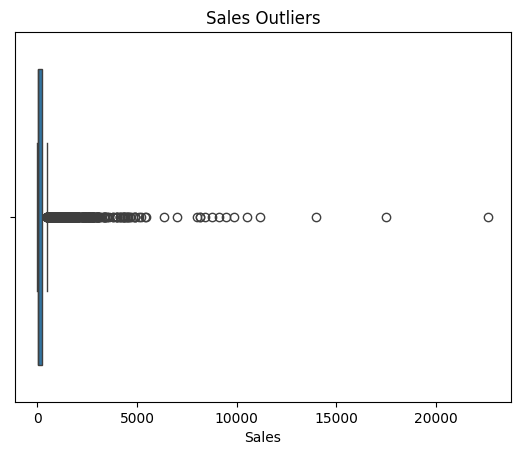

In [47]:
# Create a new figure for the plot
plt.figure()
# Generate a boxplot visualization of the 'Sales' column from the dataframe
sns.boxplot(x=df['Sales'])
# Add a title to the plot
plt.title('Sales Outliers')
# Display the plot
plt.show()

# The many circles on the right side indicate very high sales values
# This means:
# Most sales are relatively small
# Few orders have extremely high sales
# This is very common in business datasets  
# These circles are sales outliers

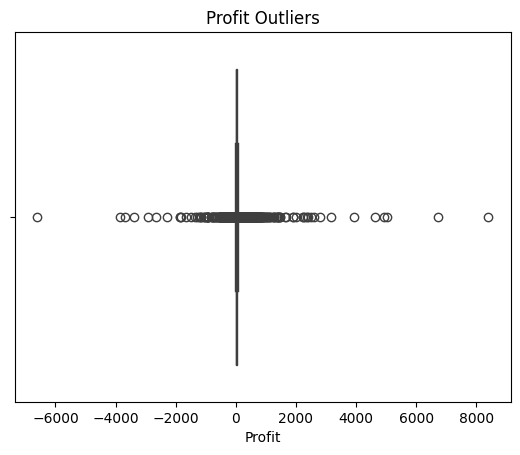

In [48]:
plt.figure()
# Generate a boxplot visualization of the 'Profit' column from the dataframe
sns.boxplot(x=df['Profit'])
plt.title('Profit Outliers')
plt.show()

# Circles appear on both sides
# Right side → very high profit
# Left side → very high loss (negative profit)
# This means:
# Some orders made huge profit
# Some caused huge losses
# These circles are profit outliers

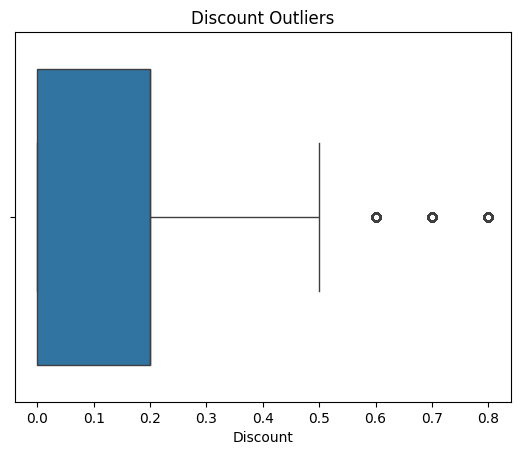

In [49]:
plt.figure()
# Generate a boxplot visualization of the 'Discount' column from the dataframe
sns.boxplot(x=df['Discount'])
plt.title('Discount Outliers')
plt.show()

# Most discounts are clustered at lower values
# Circles on the right side (high discounts) show:
# Rare cases of very heavy discounting
# These circles are discount outliers

**EDA AND BUSINESS ANALYSIS**

In [ ]:
df.info()

In [ ]:
# KPIs 
Total_sales = df['Sales'].sum()
Total_profit = df['Profit'].sum()
Avg_discount = df['Discount'].mean()

print('Total Sales:',round(Total_sales,2))
print('Total Profit:',round(Total_profit,2))
print('Average Discount',round(Avg_discount,2))

In [ ]:
# Sales and Profit by Category 
category_summary = df.groupby('Category')[['Sales','Profit']].sum().reset_index()
category_summary

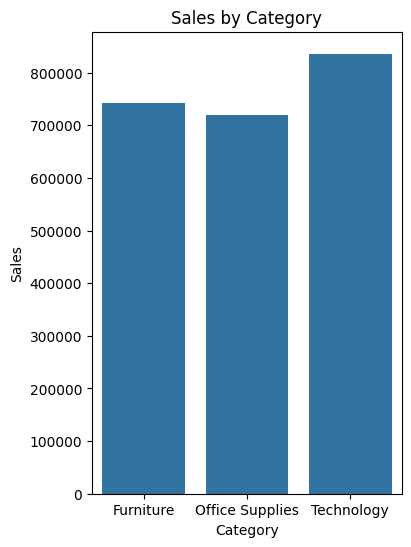

In [43]:
plt.figure(figsize = (4,6)) # figsize = (width,height)
sns.barplot(data = category_summary,x = 'Category', y = 'Sales')
plt.title('Sales by Category')
plt.show()

In [ ]:
plt.figure(figsize = (4,6)) # figsize = (width,height)
sns.barplot(data = category_summary,x = 'Category', y = 'Profit')
plt.title('Profit by Category')
plt.show()

In [ ]:
# Sales and Profit by Sub Category 
subcat_summary = df.groupby('Sub_Category')[['Sales', 'Profit']].sum().reset_index()
subcat_summary = subcat_summary.sort_values(by='Sales', ascending=False)
subcat_summary

In [44]:
# Region wise Performance
import warnings
warnings.filterwarnings("ignore")
region_summary = df.groupby('Region')[['Sales','Profit']].sum().reset_index()
region_summary

,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


In [ ]:
plt.figure(figsize = (4,6))
sns.barplot(data = region_summary, x = 'Region', y = 'Profit')
plt.title('Profit by Region')
plt.show()

In [ ]:
# Discount vs Profit
plt.figure()
sns.scatterplot(data = df, x = 'Discount', y = 'Profit')
plt.title('Discount vs Profit')
plt.show()

In [46]:
# Correlation Analysis
df[['Sales','Profit','Discount','Quantity']].corr()

,Sales,Profit,Discount,Quantity
Sales,1.000000,0.479064,-0.028190,0.200795
Profit,0.479064,1.000000,-0.219487,0.066253
Discount,-0.028190,-0.219487,1.000000,0.008623
Quantity,0.200795,0.066253,0.008623,1.000000


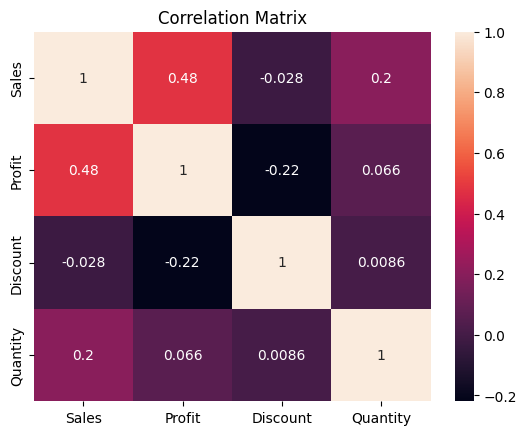

In [45]:
plt.figure()
# If we use annot(annotations) = False then instead of numbers we will se colors in the box
sns.heatmap(df[['Sales','Profit','Discount','Quantity']].corr(),annot = True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Shipping Mode Analysis 
ship_summary = df.groupby('Ship_Mode')[['Sales','Profit']].sum().reset_index()
ship_summary

In [ ]:
# Top 10 profitable prodcuts 
top_products = df.groupby('Product_Name')['Profit'].sum().sort_values(ascending = False).head(10)
top_products

In [ ]:
# Bottom 10 loss prodcuts 
loss_products = df.groupby('Product_Name')['Profit'].sum().sort_values().head(10)
loss_products 

In [ ]:
df.to_csv('Superstore_Final_Data.csv',index = False)